<a id = 'top'></a>

# A quick-start guide to Keras
  * A. [What is Keras?](#introToKeras) 
  * B. [Basic Operations](#kerasBasicOps)  
      * 1. [Sequential interface](#sequentialInterface)
      * 2. [Creating a model](#createModel)
      * 3. [Compiling a model](#compileModel)
      * 4. [Training a model](#trainModel)
      * 5. [Saving a model](#saveModel)
      * 6. [Reloading a model](#reloadModel)
  * C. [Defining your model inside a function to add flexibility](#functionWrapper)

[Return to Top](#top)
<a id = 'introToKeras'></a>
## A. What is Keras?

[Keras](https://en.wikipedia.org/wiki/Keras) is a front-end interface to Tensorflow.  Keras has its own [documentation](https://keras.io/about/) and is also well-documented in [tensorflow keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras).  

Using the Keras interface greatly simplifies the task of constructing, training and using tensorflow models.  In this notebook we'll build and train a basic fully-connected neural net and learn some of the important operations available within Keras.  We'll use the [sequential-model syntax](https://keras.io/guides/sequential_model/), which is useful when becoming familiar with Keras and appropriate for models where each layer has a single output feeding sequentially to the next layer.  

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.3.1


[Return to Top](#top)
<a id = 'kerasBasicOps'></a>
## B. Basic Operations in Keras

1. Construct the model graph from model input, model layers
2. Build the model (from input, output of the graph)
3. Compile the model with optimizer, metric set, loss function
4. Fit the model / evaluate the model
5. Save the model and re-use the model

[Return to Top](#top)
<a id = 'sequentialInterface'></a>
### B1. Sequential interface

[Return to Top](#top)
<a id = 'createModel'></a>
### B2. Creating a model

In [8]:
hidden_units = 200
model = keras.Sequential(
    [keras.Input(shape=(2,)),
     keras.layers.Dense(200, activation="relu", name="h1_layer"),
     keras.layers.Dense(100, activation="relu", name="h2_layer"),
     keras.layers.Dense(2, activation="sigmoid", name="output_layer"),
    ]
)

[Return to Top](#top)
<a id = 'compileModel'></a>
### B3. Compiling a model

In [9]:
# Define loss function, optimizer, and accuracy
# Here we're using some basic loss, optimizer, metrics provided by Keras, all of which use reasonable defaults.

# However if you want to adjust things like learning rate you'll want to use the full Keras functional version of these to have ability to change
# ... the arguments from their default values.

loss = "sparse_categorical_crossentropy"    # Using sparse crossentropy when your class values are defined by unique labels.  Alternatively, using
#                                             ...categorical_crossentropy requires your labels to be in one-hot vector format.
optimizer = "adam"       # adam is an optimizer we'll use a lot
metrics = ["sparse_categorical_accuracy"] # This is a better accuracy metric to use
# ...as there is a bug in "accuracy" metric preventing re-loaded model from calculating 
# ...correct accuracy

model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

[Return to Top](#top)
<a id = 'trainModel'></a>
### B4. Training a model

#### Define the dataset

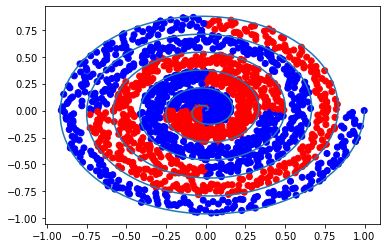

In [10]:
# Let's look at some data and labels:

import matplotlib.pyplot as plt
import numpy as np
nrotate =  6
size = 2040
theta = np.linspace(start = 0, stop = nrotate * 2 * np.pi, num = size)
len(theta)
r = 1/(nrotate * 2 * np.pi) * theta
x = r * np.cos(theta)
y = r * np.sin(theta)
# Toggle the below line to see the dividing line between groups
plt.plot(x, y)
# thickness = 1/(nrotate * 2 * np.pi) * 2 pi = 1 / nrotate
1 / nrotate * np.random.uniform(size = 100)
eps = 0.8
nparts = 4
colors = []
for i in range(nparts):
    colors.extend(['r']*int(size / (2*nparts)) + ['b']*int(size / (2*nparts)))
labels = ['r']*int(size/nparts) + ['b']*int(size/nparts)+['r']*int(size/nparts) + ['b']*int(size/nparts)
rjitter = r - eps / nrotate * np.random.uniform(size = size)
xjitter = rjitter*np.cos(theta)
yjitter = rjitter*np.sin(theta)
plt.scatter(xjitter, yjitter, color = colors)

In [11]:
from sklearn.model_selection import train_test_split
# Convert our data to numpy arrays with correct shapes for our model input, output
datain = np.transpose(np.vstack([x,y]))
labels = np.array([1 if color=='b' else 0 for color in colors]).reshape([-1,1])

# Create training, eval split
train_input, test_input, train_labels, test_labels = train_test_split(datain, labels, test_size = 0.2, 
                                                         random_state = 41,
                                                         shuffle = True)
# Train the model using our training input, labels
## the validation_split arguments states that 20% of the training data is to be used
## ...as dev data.
model.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)

Epoch 1/300
4/4 [==============================] - 0s 37ms/step - loss: 0.6907 - sparse_categorical_accuracy: 0.4973 - val_loss: 0.6904 - val_sparse_categorical_accuracy: 0.4771
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6832 - sparse_categorical_accuracy: 0.5387 - val_loss: 0.6880 - val_sparse_categorical_accuracy: 0.4801
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6775 - sparse_categorical_accuracy: 0.5594 - val_loss: 0.6856 - val_sparse_categorical_accuracy: 0.5321
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6721 - sparse_categorical_accuracy: 0.6015 - val_loss: 0.6831 - val_sparse_categorical_accuracy: 0.5688
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6664 - sparse_categorical_accuracy: 0.6314 - val_loss: 0.6810 - val_sparse_categorical_accuracy: 0.6055
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6609 - sparse_categorical_accuracy: 0.664

4/4 [==============================] - 0s 7ms/step - loss: 0.5908 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.6272 - val_sparse_categorical_accuracy: 0.6208
Epoch 48/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5891 - sparse_categorical_accuracy: 0.6774 - val_loss: 0.6250 - val_sparse_categorical_accuracy: 0.6544
Epoch 49/300
4/4 [==============================] - 0s 8ms/step - loss: 0.5881 - sparse_categorical_accuracy: 0.6828 - val_loss: 0.6231 - val_sparse_categorical_accuracy: 0.6514
Epoch 50/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5873 - sparse_categorical_accuracy: 0.6812 - val_loss: 0.6231 - val_sparse_categorical_accuracy: 0.6453
Epoch 51/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5857 - sparse_categorical_accuracy: 0.6858 - val_loss: 0.6233 - val_sparse_categorical_accuracy: 0.6544
Epoch 52/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5853 - sparse_categorical_accuracy: 0.6858 - val_

Epoch 93/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5369 - sparse_categorical_accuracy: 0.7326 - val_loss: 0.5649 - val_sparse_categorical_accuracy: 0.7095
Epoch 94/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5351 - sparse_categorical_accuracy: 0.7517 - val_loss: 0.5608 - val_sparse_categorical_accuracy: 0.7401
Epoch 95/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5318 - sparse_categorical_accuracy: 0.7464 - val_loss: 0.5673 - val_sparse_categorical_accuracy: 0.7034
Epoch 96/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5369 - sparse_categorical_accuracy: 0.7188 - val_loss: 0.5639 - val_sparse_categorical_accuracy: 0.7217
Epoch 97/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5306 - sparse_categorical_accuracy: 0.7494 - val_loss: 0.5564 - val_sparse_categorical_accuracy: 0.7064
Epoch 98/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5324 - sparse_categorical_accuracy: 

Epoch 139/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4242 - sparse_categorical_accuracy: 0.7916 - val_loss: 0.4538 - val_sparse_categorical_accuracy: 0.7737
Epoch 140/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4202 - sparse_categorical_accuracy: 0.7916 - val_loss: 0.4472 - val_sparse_categorical_accuracy: 0.7829
Epoch 141/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4156 - sparse_categorical_accuracy: 0.8031 - val_loss: 0.4414 - val_sparse_categorical_accuracy: 0.7829
Epoch 142/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4135 - sparse_categorical_accuracy: 0.8008 - val_loss: 0.4397 - val_sparse_categorical_accuracy: 0.7798
Epoch 143/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4125 - sparse_categorical_accuracy: 0.8092 - val_loss: 0.4337 - val_sparse_categorical_accuracy: 0.7920
Epoch 144/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4059 - sparse_categorical_accu

Epoch 185/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2816 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.3196 - val_sparse_categorical_accuracy: 0.8899
Epoch 186/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2788 - sparse_categorical_accuracy: 0.9157 - val_loss: 0.3129 - val_sparse_categorical_accuracy: 0.8869
Epoch 187/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2770 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.3083 - val_sparse_categorical_accuracy: 0.8869
Epoch 188/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2736 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.3074 - val_sparse_categorical_accuracy: 0.8869
Epoch 189/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2720 - sparse_categorical_accuracy: 0.9073 - val_loss: 0.3084 - val_sparse_categorical_accuracy: 0.8838
Epoch 190/300
4/4 [==============================] - 0s 5ms/step - loss: 0.2699 - sparse_categorical_accu

Epoch 231/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1858 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.2178 - val_sparse_categorical_accuracy: 0.8960
Epoch 232/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1847 - sparse_categorical_accuracy: 0.9287 - val_loss: 0.2151 - val_sparse_categorical_accuracy: 0.9205
Epoch 233/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1833 - sparse_categorical_accuracy: 0.9487 - val_loss: 0.2136 - val_sparse_categorical_accuracy: 0.9419
Epoch 234/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1813 - sparse_categorical_accuracy: 0.9487 - val_loss: 0.2118 - val_sparse_categorical_accuracy: 0.9113
Epoch 235/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1793 - sparse_categorical_accuracy: 0.9303 - val_loss: 0.2128 - val_sparse_categorical_accuracy: 0.8991
Epoch 236/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1777 - sparse_categorical_accu

Epoch 277/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.1532 - val_sparse_categorical_accuracy: 0.9694
Epoch 278/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.1520 - val_sparse_categorical_accuracy: 0.9664
Epoch 279/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1257 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.1507 - val_sparse_categorical_accuracy: 0.9755
Epoch 280/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1233 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.1496 - val_sparse_categorical_accuracy: 0.9480
Epoch 281/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1221 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.1484 - val_sparse_categorical_accuracy: 0.9755
Epoch 282/300
4/4 [==============================] - 0s 5ms/step - loss: 0.1220 - sparse_categorical_accu

In [12]:
# Evaluate the data with our test_input, test_labels
model.evaluate(test_input, test_labels)

13/13 [==============================] - 0s 2ms/step - loss: 0.1301 - sparse_categorical_accuracy: 0.9779


[0.1301054060459137, 0.9779411554336548]

[Return to Top](#top)
<a id = 'saveModel'></a>
### B5. Saving a model

In [13]:
# Saving the model
model.save("./keras_qs_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./keras_qs_model\assets


[Return to Top](#top)
<a id = 'reloadModel'></a>
### B6. Reloading a model

In [14]:
# Ensure that reloaded model evaluates to same score as when we saved it originally.
model2 = keras.models.load_model("./keras_qs_model")
model2.evaluate(train_input, train_labels)

51/51 [==============================] - 0s 941us/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9853


[0.10878460109233856, 0.9852941036224365]

[Return to Top](#top)
<a id = 'functionWrapper'></a>
## C. Defining your model inside a function to add flexibility

In [15]:
# If you want to re-run your model with different settings and hyper-parameters there's a good chance you'll benefit by using a class definition.

# Define parameters in a dictionary
modelparams = dict(
    layers = ( (200, 'relu'), (100, 'relu') ), 
    n_classes = 2, # number of output classes -- 2 for binary
    learning_rate = 0.01, 
    output_activation = "sigmoid",
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["sparse_categorical_accuracy"]
)


def basic_km(**kwargs):
    layers = kwargs.get('layers', ((10, 'relu')) ) 
    n_classes = kwargs.get('n_classes', 2)
    learning_rate = kwargs.get('learning_rate', 0.01)
    output_activation = kwargs.get('output_activation', "sigmoid")
    optimizer = kwargs.get('optimizer', "adam")
    loss = kwargs.get('loss', "categorical_crossentropy")
    metrics = kwargs.get('metrics', ["accuracy"])
    
    num_layers = len(layers)
    
    graph = []
    # Define input shape
    graph.append(keras.Input(shape=(2,)))
    # Add hidden layers
    for i, layer in enumerate(layers):
        graph.append(keras.layers.Dense(layer[0], activation = layer[1], name = "h" + str(i+1) + "layer"   ))
    # Add output layer
    graph.append(keras.layers.Dense(n_classes, activation = output_activation, name="output_layer"))
    
    # Define a sequential model from inputs and outputs of graph
    model = keras.Sequential(graph)
    
    # Compile the model
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)
    return model

modelFromDef = basic_km(**modelparams)

# Train model 
modelFromDef.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)    
        

Epoch 1/300
4/4 [==============================] - 0s 40ms/step - loss: 0.6931 - sparse_categorical_accuracy: 0.5042 - val_loss: 0.6909 - val_sparse_categorical_accuracy: 0.5291
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6857 - sparse_categorical_accuracy: 0.5977 - val_loss: 0.6884 - val_sparse_categorical_accuracy: 0.5535
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 0.6804 - sparse_categorical_accuracy: 0.6176 - val_loss: 0.6864 - val_sparse_categorical_accuracy: 0.6086
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6753 - sparse_categorical_accuracy: 0.6513 - val_loss: 0.6842 - val_sparse_categorical_accuracy: 0.6177
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6702 - sparse_categorical_accuracy: 0.6720 - val_loss: 0.6811 - val_sparse_categorical_accuracy: 0.6361
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6643 - sparse_categorical_accuracy: 0.682

Epoch 47/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5856 - sparse_categorical_accuracy: 0.6828 - val_loss: 0.6191 - val_sparse_categorical_accuracy: 0.6453
Epoch 48/300
4/4 [==============================] - 0s 5ms/step - loss: 0.5840 - sparse_categorical_accuracy: 0.6828 - val_loss: 0.6148 - val_sparse_categorical_accuracy: 0.6453
Epoch 49/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5830 - sparse_categorical_accuracy: 0.6843 - val_loss: 0.6134 - val_sparse_categorical_accuracy: 0.6575
Epoch 50/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5818 - sparse_categorical_accuracy: 0.6912 - val_loss: 0.6121 - val_sparse_categorical_accuracy: 0.6575
Epoch 51/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5803 - sparse_categorical_accuracy: 0.7034 - val_loss: 0.6129 - val_sparse_categorical_accuracy: 0.6820
Epoch 52/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5802 - sparse_categorical_accuracy: 

4/4 [==============================] - 0s 7ms/step - loss: 0.5265 - sparse_categorical_accuracy: 0.7517 - val_loss: 0.5520 - val_sparse_categorical_accuracy: 0.7217
Epoch 94/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5288 - sparse_categorical_accuracy: 0.7632 - val_loss: 0.5502 - val_sparse_categorical_accuracy: 0.7370
Epoch 95/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5248 - sparse_categorical_accuracy: 0.7510 - val_loss: 0.5610 - val_sparse_categorical_accuracy: 0.7034
Epoch 96/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5258 - sparse_categorical_accuracy: 0.7364 - val_loss: 0.5550 - val_sparse_categorical_accuracy: 0.7339
Epoch 97/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5228 - sparse_categorical_accuracy: 0.7571 - val_loss: 0.5512 - val_sparse_categorical_accuracy: 0.7217
Epoch 98/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5219 - sparse_categorical_accuracy: 0.7617 - val_

Epoch 139/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4597 - sparse_categorical_accuracy: 0.7870 - val_loss: 0.5000 - val_sparse_categorical_accuracy: 0.7554
Epoch 140/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4579 - sparse_categorical_accuracy: 0.7862 - val_loss: 0.4901 - val_sparse_categorical_accuracy: 0.7615
Epoch 141/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4564 - sparse_categorical_accuracy: 0.7900 - val_loss: 0.4919 - val_sparse_categorical_accuracy: 0.7615
Epoch 142/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4540 - sparse_categorical_accuracy: 0.7992 - val_loss: 0.4911 - val_sparse_categorical_accuracy: 0.7615
Epoch 143/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4518 - sparse_categorical_accuracy: 0.8061 - val_loss: 0.4891 - val_sparse_categorical_accuracy: 0.7431
Epoch 144/300
4/4 [==============================] - 0s 6ms/step - loss: 0.4534 - sparse_categorical_accu

Epoch 185/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3700 - sparse_categorical_accuracy: 0.8391 - val_loss: 0.4198 - val_sparse_categorical_accuracy: 0.7920
Epoch 186/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3698 - sparse_categorical_accuracy: 0.8375 - val_loss: 0.4061 - val_sparse_categorical_accuracy: 0.8104
Epoch 187/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3641 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.4095 - val_sparse_categorical_accuracy: 0.7982
Epoch 188/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3627 - sparse_categorical_accuracy: 0.8406 - val_loss: 0.4031 - val_sparse_categorical_accuracy: 0.8043
Epoch 189/300
4/4 [==============================] - 0s 7ms/step - loss: 0.3582 - sparse_categorical_accuracy: 0.8414 - val_loss: 0.3976 - val_sparse_categorical_accuracy: 0.8073
Epoch 190/300
4/4 [==============================] - 0s 6ms/step - loss: 0.3572 - sparse_categorical_accu

Epoch 231/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2696 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.3176 - val_sparse_categorical_accuracy: 0.8807
Epoch 232/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2688 - sparse_categorical_accuracy: 0.9126 - val_loss: 0.3064 - val_sparse_categorical_accuracy: 0.8899
Epoch 233/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2671 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.3040 - val_sparse_categorical_accuracy: 0.8838
Epoch 234/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2632 - sparse_categorical_accuracy: 0.9088 - val_loss: 0.3015 - val_sparse_categorical_accuracy: 0.8807
Epoch 235/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9126 - val_loss: 0.3015 - val_sparse_categorical_accuracy: 0.8838
Epoch 236/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2582 - sparse_categorical_accu

Epoch 277/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1951 - sparse_categorical_accuracy: 0.9295 - val_loss: 0.2428 - val_sparse_categorical_accuracy: 0.8960
Epoch 278/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1948 - sparse_categorical_accuracy: 0.9303 - val_loss: 0.2383 - val_sparse_categorical_accuracy: 0.8930
Epoch 279/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1936 - sparse_categorical_accuracy: 0.9226 - val_loss: 0.2396 - val_sparse_categorical_accuracy: 0.8930
Epoch 280/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1914 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.2390 - val_sparse_categorical_accuracy: 0.9021
Epoch 281/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9402 - val_loss: 0.2338 - val_sparse_categorical_accuracy: 0.8991
Epoch 282/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1893 - sparse_categorical_accu